# Imports

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.preprocessing.image import img_to_array
from PIL import Image
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.tree import DecisionTreeClassifier

# Load VGG16 model pre-trained on ImageNet

In [8]:
# Load the pre-trained VGG16 model, excluding the top layer (used for classification)
# This model is used to extract features from images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Function to load images from a specified folder and extract features using the VGG16 model
def load_data_extracted_features(data_folder):
    data = []  # To store the extracted features
    labels = []  # To store the corresponding labels
    for category in os.listdir(data_folder):
        category_path = os.path.join(data_folder, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    # Load and preprocess the image
                    image = Image.open(img_path).convert('RGB')  # Convert image to RGB
                    image = image.resize((32, 32))  # Resize image to 32x32 pixels
                    image = img_to_array(image)  # Convert image to array format
                    image = preprocess_input(image)  # Preprocess image for VGG16
                    # Extract features using the VGG16 model
                    features = base_model.predict(np.expand_dims(image, axis=0))
                    data.append(features.flatten())  # Flatten the extracted features
                    labels.append(category)  # Append the corresponding label
                except Exception as e:
                    # Handle errors during image loading or processing
                    print(f"Error loading image {img_path}: {e}")
    return np.array(data), np.array(labels)
    
train_data, train_labels = load_data_extracted_features('C:\\Users\\dovy4\\Desktop\\1000')
test_data, test_labels = load_data_extracted_features('C:\\Users\\dovy4\\Desktop\\test_100')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

# Function to load images and extract features

In [11]:
# Function to load images from a specified folder without feature extraction
# This function loads and flattens images, storing the raw pixel values
def load_data(main_folder):
    images = []  # To store raw images
    labels = []  # To store corresponding labels
    for folder_name in os.listdir(main_folder):
        folder_path = os.path.join(main_folder, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                try:
                    # Load and preprocess the image
                    image = Image.open(image_path).convert('RGB')  # Convert image to RGB
                    image = image.resize((32, 32))  # Resize image to 32x32 pixels
                    image = np.array(image).flatten()  # Flatten the image (32x32x3)
                    images.append(image)  # Append flattened image to the list
                    labels.append(folder_name)  # Append corresponding label
                except Exception as e:
                    # Handle errors during image loading or processing
                    print(f"Error loading image {image_path}: {e}")
    return np.array(images), np.array(labels)


train_data_basic, train_labels_basic = load_data('C:\\Users\\dovy4\\Desktop\\1000')
test_data_basic, test_labels_basic = load_data('C:\\Users\\dovy4\\Desktop\\test_100')

# Process data, train and test

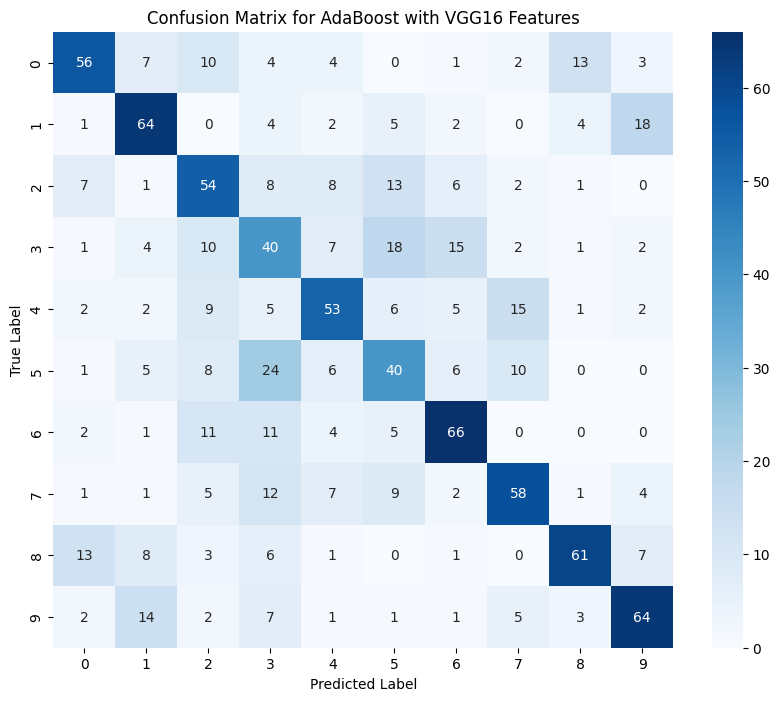

In [21]:
# this is with VGG16

# Encode labels as integers for the model
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)  # Fit and transform training labels
test_labels = label_encoder.transform(test_labels)  # Transform test labels

# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
# Using features extracted with VGG16
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, algorithm="SAMME")


# Train the AdaBoost model on the training data
ada.fit(train_data, train_labels)

# Predict on the test data using the trained AdaBoost model
test_predictions = ada.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost with VGG16 Features')
plt.show()

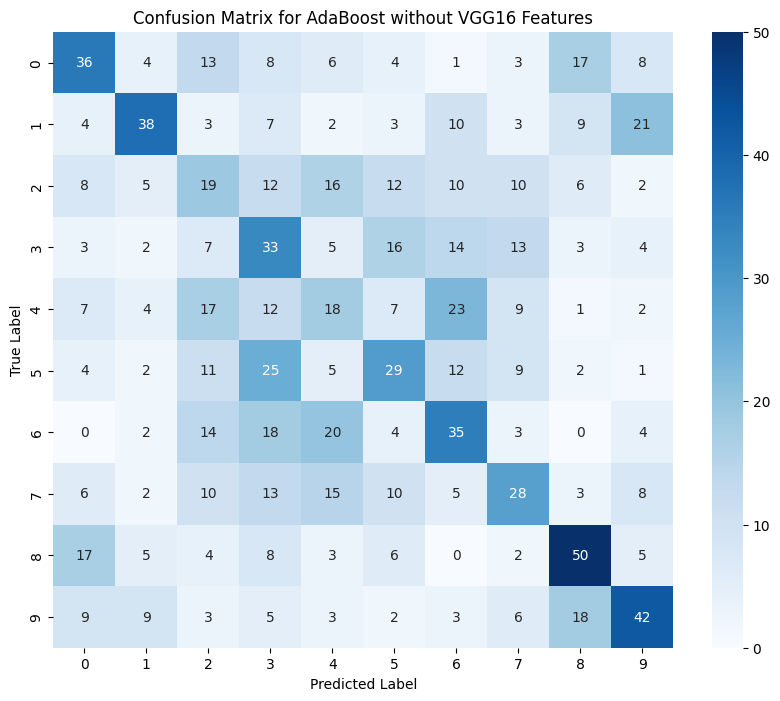

In [23]:
# this is the basic train

# Encode labels as integers for the basic model (using raw pixel values)
label_encoder_basic = LabelEncoder()
train_labels_basic = label_encoder_basic.fit_transform(train_labels_basic)  # Fit and transform training labels
test_labels_basic = label_encoder_basic.transform(test_labels_basic)  # Transform test labels

# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
# Using raw pixel values
ada_basic = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, algorithm="SAMME")

# Train the AdaBoost model on the training data
ada_basic.fit(train_data_basic, train_labels_basic)

# Predict on the test data using the trained AdaBoost model
test_predictions_basic = ada_basic.predict(test_data_basic)

# Calculate accuracy
accuracy_basic = accuracy_score(test_labels_basic, test_predictions_basic)

# Confusion Matrix
conf_matrix_basic = confusion_matrix(test_labels_basic, test_predictions_basic)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_basic, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_basic.classes_, yticklabels=label_encoder_basic.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost without VGG16 Features')
plt.show()

In [24]:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Accuracy_basic: {accuracy_basic:.4f}")

Test Accuracy: 0.5560
Test Accuracy_basic: 0.3280
